## EDA (iris dataset)

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

iris = datasets.load_iris()

In [2]:
type(iris)

sklearn.utils.Bunch

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [5]:
iris.data.shape

(150, 4)

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
x = iris.data
y = iris.target

df = pd.DataFrame(x, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


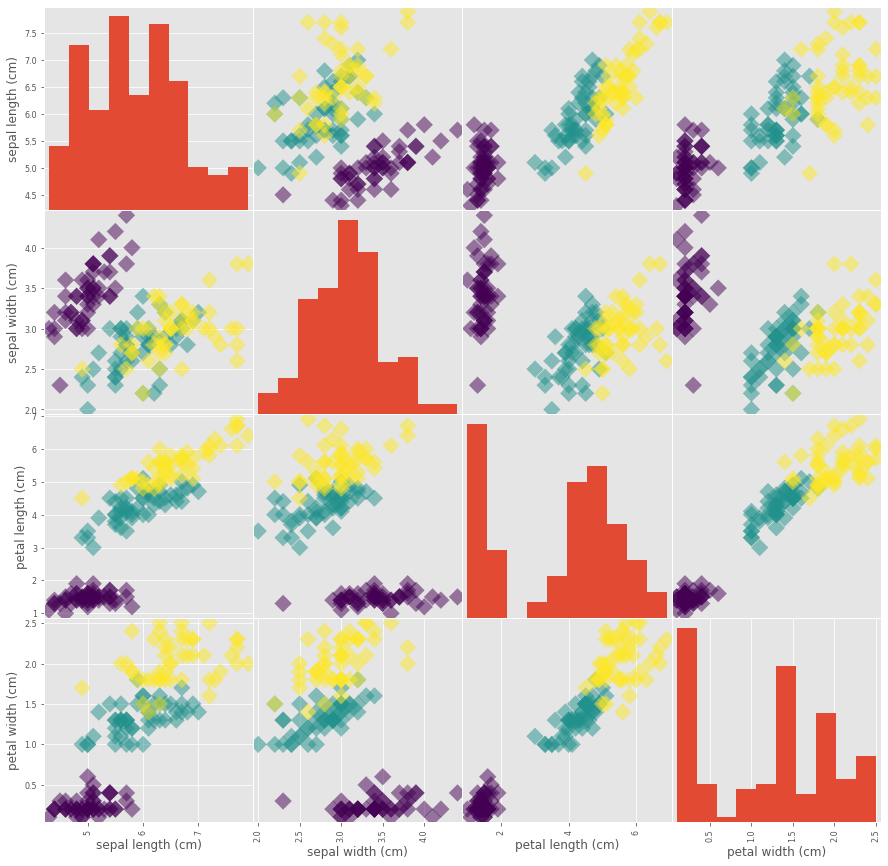

In [8]:
_ = pd.plotting.scatter_matrix(df, c=y, figsize=[15, 15], s=150, marker='D')
# We can see that petal length and peal width are highly correlated.

## Using scikit-learn to fit a classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=6)
model.fit(iris['data'], iris['target'])

KNeighborsClassifier(n_neighbors=6)

In [10]:
iris['data'].shape

(150, 4)

In [11]:
iris['target'].shape

(150,)

## Predicting on unlabeled data

In [12]:
x_new = np.array([[5.6, 2.8, 3.9, 1.1], 
                  [5.7, 2.6, 3.8, 1.3], 
                  [4.7, 3.2, 1.3, 0.2]])
pred = model.predict(x_new)
pred

array([1, 1, 0])

## Train/test split

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=21, stratify=y)

model = KNeighborsClassifier(n_neighbors=8)

model.fit(x_train, y_train)
pred = model.predict(x_test)
pred

array([2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2,
       1])

In [14]:
model.score(x_test, y_test)

0.9555555555555556

## Increasing n_neighbors (decreasing model flexibility)

In [15]:
for i in range(1, 26):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print('{:2}'.format(i),                                 # num iteration
          '{:0.3f}'.format(model.score(x_train, y_train)),  # training accuracy
          '{:0.3f}'.format(model.score(x_test, y_test)))    # testing accuracy

 1 1.000 0.978
 2 0.971 0.956
 3 0.971 0.978
 4 0.971 0.978
 5 0.981 0.978
 6 0.981 0.956
 7 0.981 0.956
 8 0.981 0.956
 9 0.971 0.978
10 0.981 0.956
11 0.981 0.978
12 0.971 0.956
13 0.981 0.956
14 0.981 0.956
15 0.981 0.978
16 0.962 0.956
17 0.971 0.933
18 0.952 0.956
19 0.971 0.956
20 0.952 0.956
21 0.962 0.933
22 0.933 0.956
23 0.933 0.933
24 0.933 0.956
25 0.952 0.956


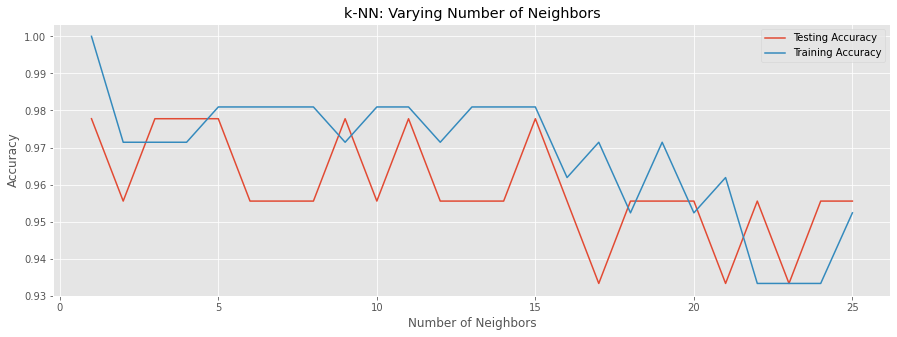

In [16]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 26)
train_accuracy = np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    model = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    model.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = model.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = model.score(x_test, y_test)

# Generate plot
plt.figure(figsize=(15, 5))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## The digits regognition dataset

In [17]:
from sklearn import datasets
import matplotlib.pyplot as plt

# load the digits dataset: digits
digits = datasets.load_digits()

In [18]:
# print the keys and DESCR of the dataset
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [19]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [20]:
# print the shape of the images and data keys
digits.images.shape

(1797, 8, 8)

In [21]:
digits.data.shape

(1797, 64)

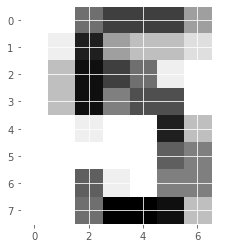

In [22]:
# display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

## Train/Test Split + Fit/Predict/Accuracy

In [23]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
x = digits.data
y = digits.target

# Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
model = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
model.fit(x_train, y_train)

# Print the accuracy
print(model.score(x_test, y_test))

0.9833333333333333


## Overfitting and underfitting

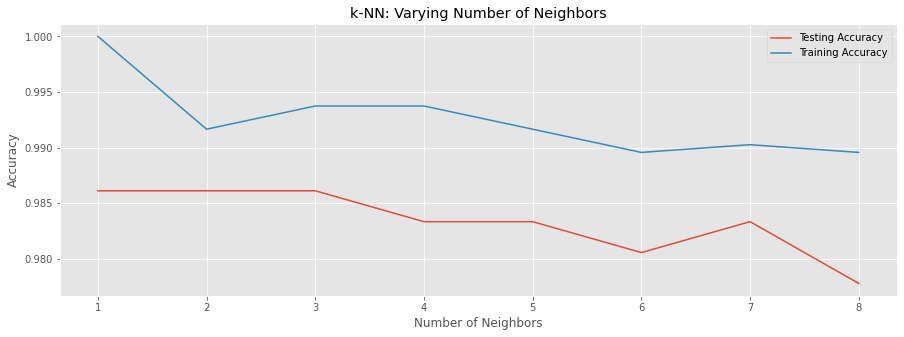

In [24]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    model = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    model.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = model.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = model.score(x_test, y_test)

# Generate plot
plt.figure(figsize=(15, 5))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()